In [1]:
using Plots
using LinearAlgebra

In [2]:
# Birds chirping data
# From http://www.cs.cornell.edu/~bindel/class/sjtu-summer18/lec/2018-06-13.pdf and http://mste.illinois.edu/
chirp_cnts = [20, 16, 20, 18, 17, 16, 15, 17, 15, 16, 15, 17, 16, 17, 14]  # bird chirps per 15 seconds
temps      = [89, 72, 93, 84, 81, 75, 70, 82, 69, 83, 80, 83, 81, 84, 76]  # temperature measurements

15-element Array{Int64,1}:
 89
 72
 93
 84
 81
 75
 70
 82
 69
 83
 80
 83
 81
 84
 76

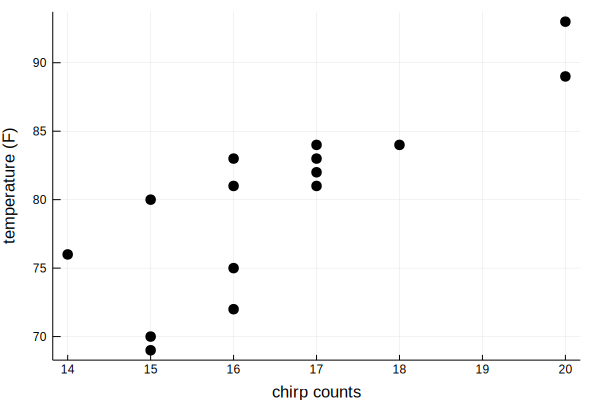

In [3]:
scatter(chirp_cnts, temps, 
        xlabel="chirp counts", ylabel="temperature (F)", 
        markersize=5, color=:black, label="")

In [4]:
A = [chirp_cnts ones(length(chirp_cnts))]
x = A \ temps

2-element Array{Float64,1}:
  3.2163461538461404
 26.74198717948736  

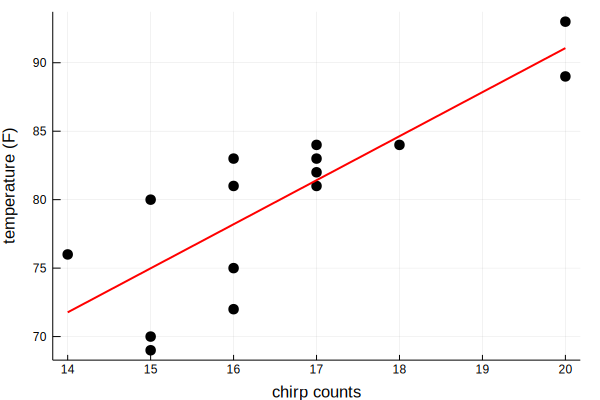

In [5]:
plot!(chirp_cnts, A * x, lw=2, color="red", label="")

In [6]:
r = A * x - temps;
norm(r' * A, 2)

1.1529339209828293e-11